In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
data = 'annotations.csv'
df = pd.read_csv(data, index_col = 0)
df = df.drop('type', axis=1).drop('confidence', axis=1).drop('filename', axis=1)
features = pd.read_csv(data, usecols = ['AU04_c', 'AU05_c', 'AU07_c','AU09_c','AU23_c','AU04_r', 'AU05_r', 'AU07_r','AU09_r','AU23_r'])
features = features.columns.values.tolist()
features2 = df.columns.values.tolist()
features2 = features2[39:711]
features = features + features2
features = df[features]
df = features['target'] = df['target']
df = features

In [16]:
features

,AU23_c,AU09_c,AU07_c,AU05_c,AU04_c,AU23_r,AU09_r,AU07_r,AU05_r,AU04_r,...,gaze_angle_y,gaze_angle_x,gaze_1_z,gaze_1_y,gaze_1_x,gaze_0_z,gaze_0_y,gaze_0_x,face,target
0,1,1,1,0,1,0.26,1.75,2.23,0.00,1.05,...,0.107,0.117,-0.996786,0.078735,0.014778,-0.967552,0.131643,0.215668,0,loud
0,0,1,1,1,0,0.00,2.54,2.19,0.87,1.06,...,0.387,0.142,-0.917749,0.396229,-0.027185,-0.895072,0.341846,0.286334,0,loud
0,0,0,1,1,0,0.00,0.07,2.84,1.08,0.03,...,0.088,-0.052,-0.977797,0.134976,-0.160293,-0.997633,0.038820,0.056766,0,loud
0,0,0,0,0,0,0.00,0.72,0.28,1.08,0.00,...,0.206,-0.053,-0.967911,0.208634,-0.140070,-0.979366,0.198882,0.035885,0,loud
0,0,1,0,0,0,0.00,1.60,1.12,0.00,0.19,...,0.124,-0.279,-0.927045,0.104162,-0.360191,-0.973601,0.133687,-0.185010,0,subtle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,1,0,1,1,0.00,0.25,0.51,1.53,1.01,...,-0.035,-0.299,-0.941094,-0.065052,-0.331830,-0.966825,-0.001300,-0.255437,0,subtle
0,0,0,1,0,0,0.03,0.00,1.65,0.03,0.11,...,0.266,-0.256,-0.912423,0.284056,-0.294613,-0.954906,0.224529,-0.194270,0,loud
0,1,0,0,1,0,0.27,0.00,0.00,0.92,0.00,...,-0.039,-0.247,-0.944792,-0.060369,-0.322062,-0.986312,-0.015674,-0.164141,0,subtle
0,1,1,0,0,0,0.65,1.64,0.00,0.00,0.00,...,0.257,-0.121,-0.933423,0.279892,-0.224459,-0.974981,0.222188,-0.006663,0,loud


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('target', axis=1))
scaled_features = scaler.transform(df.drop('target', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = df.drop('target', axis=1).columns)

In [18]:
from sklearn.model_selection import train_test_split
x = scaled_data
y = df['target']
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.2)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

        loud       0.61      0.56      0.58        25
      subtle       0.35      0.40      0.38        15

    accuracy                           0.50        40
   macro avg       0.48      0.48      0.48        40
weighted avg       0.51      0.50      0.51        40



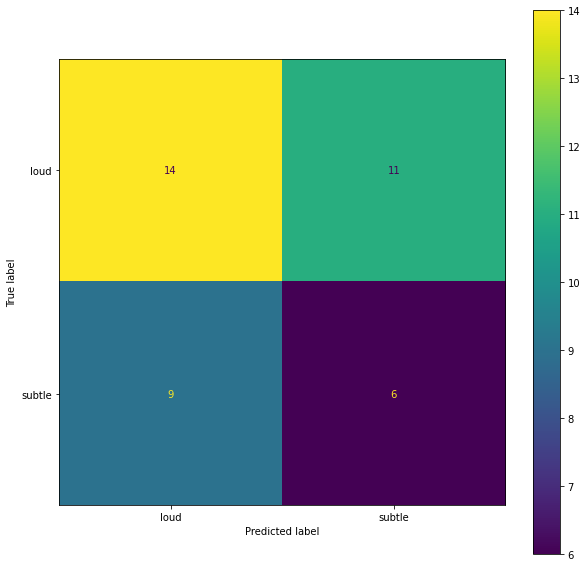

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test_data, predictions)
conf_matrix_plot = ConfusionMatrixDisplay(conf_matrix, display_labels=df['target'].unique())
fig, ax = plt.subplots(figsize=(10,10))
conf_matrix_plot.plot(ax=ax)